In [1]:
from aggregate_analysis import import_data, get_angles, make_rose_plot, get_resolution, get_shortest_distances
import numpy as np
import matplotlib.pyplot as plt
path = "From Satheeja to Jakob/"


c:\Users\jakob\Documents\work\CellStrains4SergeiSokol\archive\aggregate_analysis.py:450: SyntaxWarning: invalid escape sequence '\p'
  extratitle = f"\n{len(angles)} cells | 1-Var: Mean {np.mean(protein_sigmas[protein_sizes>cutoff]):.3} $\pm$ {np.std(protein_sigmas[protein_sizes>cutoff]):.3}"
c:\Users\jakob\Documents\work\CellStrains4SergeiSokol\archive\aggregate_analysis.py:462: SyntaxWarning: invalid escape sequence '\c'
  extratitle += f"\n$\chi^2$ p-value: {cs.pvalue:.3} | $\chi^2$: {cs.statistic:.3}"
c:\Users\jakob\Documents\work\CellStrains4SergeiSokol\archive\aggregate_analysis.py:462: SyntaxWarning: invalid escape sequence '\c'
  extratitle += f"\n$\chi^2$ p-value: {cs.pvalue:.3} | $\chi^2$: {cs.statistic:.3}"
c:\Users\jakob\Documents\work\CellStrains4SergeiSokol\archive\aggregate_analysis.py:486: SyntaxWarning: invalid escape sequence '\c'
  extratitle += f"\n$NULL MODEL \chi^2$ p-value: {cs.pvalue:.3} | $\chi^2$: {cs.statistic:.3}"
c:\Users\jakob\Documents\work\CellStrains4Se

# Fig R1-3 FActin quantification

In [35]:
data_actin = import_data(path + "Fig R1-3 FActin quantification", "actin", False)
data_adip = import_data(path + "Fig R1-3 FActin quantification", "protein", False)
data_actin_null = import_data(path + "Fig R1-3 FActin quantification", "actin_null", False)

Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R1-3 FActin quantification\results\actin
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R1-3 FActin quantification\results\protein
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R1-3 FActin quantification\results\actin_null


In [36]:
print(data_actin.keys())
print(data_adip.keys())
print(data_actin_null.keys())

dict_keys(['actin_arrows', 'actin_ids', 'actin_positions', 'actin_magnitudes'])
dict_keys(['protein_arrows', 'protein_ids', 'protein_positions', 'protein_sizes', 'protein_magnitudes'])
dict_keys(['null_arrows', 'null_ids', 'null_positions', 'null_magnitudes'])


other_non_density_hist [7352 3272 1173  882 1106 2699 3701 1883  968  981 1533 4850]
152 30400
['0', '3', '9', '20', '36', '55']
p-value: 8.913996522029412e-37 | chi2: 199.62118991262616 | N: 12
[ 2  3  3  6 13 34 55 22  6  3  2  3]
['0', '2', '8', '18', '31', '49']
p-value: 3.4575017913314395e-36 | chi2: 196.78260869565216 | N: 12
[ 5  2  2  2  9 32 48 17  7  5  4  5]
other_non_density_hist [7352 3272 1173  882 1106 2699 3701 1883  968  981 1533 4850]
152 30400
['0', '3', '9', '20', '36', '55']
p-value: 8.913996522029412e-37 | chi2: 199.62118991262616 | N: 12
[ 2  3  3  6 13 34 55 22  6  3  2  3]
['0', '2', '8', '18', '31', '49']
p-value: 3.4575017913314395e-36 | chi2: 196.78260869565216 | N: 12
[ 5  2  2  2  9 32 48 17  7  5  4  5]


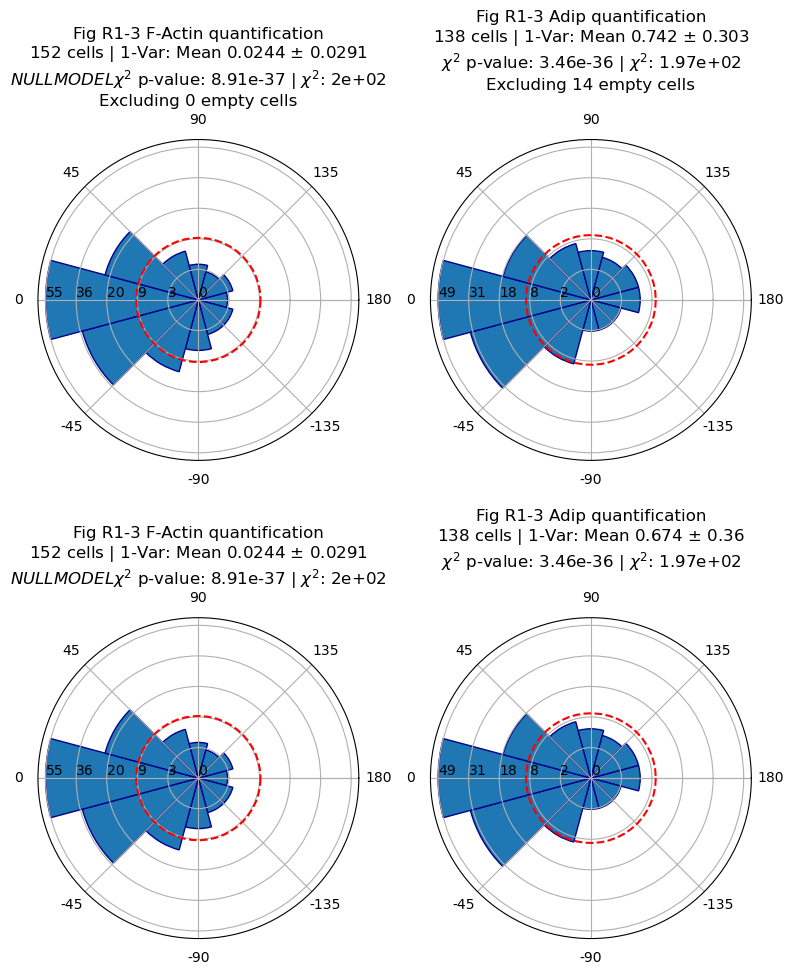

In [37]:
all_actin_arrows = []
all_actin_magnitudes = []
all_actin_sizes = []
all_adip_arrows = []
all_adip_magnitudes = []
all_adip_sizes = []


all_actin_arrows_null = []

for experiment in data_actin["actin_arrows"].keys():
    arrows = data_actin["actin_arrows"][experiment]
    magnitudes = data_actin["actin_magnitudes"][experiment]
    sizes = np.ones(len(arrows)) 
    all_actin_arrows.extend(arrows)
    all_actin_magnitudes.extend(magnitudes)
    all_actin_sizes.extend(sizes)

for experiment in data_actin_null["null_arrows"].keys():
    arrows = data_actin_null["null_arrows"][experiment]
    all_actin_arrows_null.extend(arrows)




for experiment in data_adip["protein_arrows"].keys():
    arrows = data_adip["protein_arrows"][experiment]
    magnitudes = data_adip["protein_magnitudes"][experiment]
    sizes = data_adip["protein_sizes"][experiment]
    all_adip_arrows.extend(arrows)
    all_adip_magnitudes.extend(magnitudes)
    all_adip_sizes.extend(sizes)

all_actin_arrows = np.array(all_actin_arrows)
all_actin_magnitudes = np.array(all_actin_magnitudes)
all_actin_sizes = np.array(all_actin_sizes)

all_adip_arrows = np.array(all_adip_arrows)
all_adip_magnitudes = np.array(all_adip_magnitudes)
all_adip_sizes = np.array(all_adip_sizes)

all_actin_arrows_null = np.array(all_actin_arrows_null)

fig, axs = plt.subplots(2, 2, figsize=(8, 10), dpi=100, subplot_kw=dict(polar=True))
for tf, ax in zip([True, False], axs):
    make_rose_plot(all_actin_arrows, all_actin_sizes, all_actin_magnitudes, exclude_empty=tf, fit = False, title = "Fig R1-3 F-Actin quantification", ax = ax[0], relative=np.pi, other =all_actin_arrows_null)
    make_rose_plot(all_adip_arrows, all_adip_sizes, all_adip_magnitudes, exclude_empty=tf, fit = True, title = "Fig R1-3 Adip quantification", ax = ax[1], relative=np.pi)

plt.tight_layout()

mean m: 0.72 +/- 0.13
mean b: 52.96 +/- 22.80
mean r: 0.47 +/- 0.07


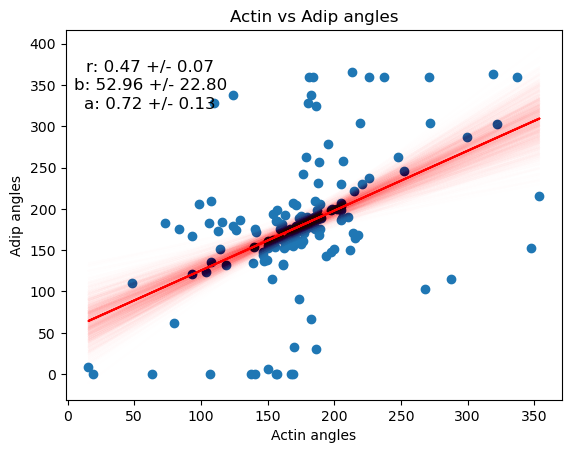

mean m: -1.32 +/- 1.73
mean b: 0.70 +/- 0.05
mean r: -0.07 +/- 0.09


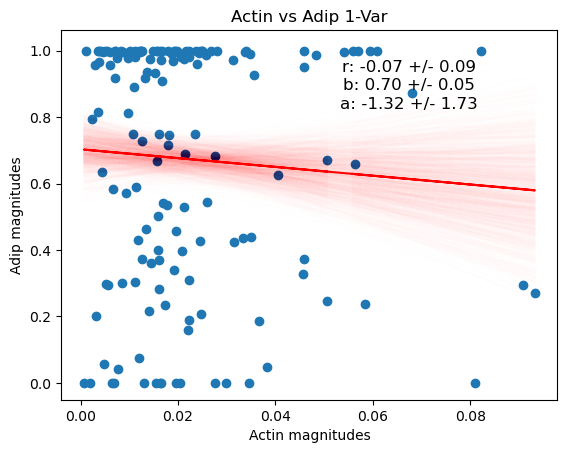

In [38]:
all_act_angles = []
all_prot_angles = []
all_actin_magnitudes = []
all_protein_magnitudes = []
for experiment in data_actin["actin_arrows"].keys():
    actin_ids = data_actin["actin_ids"][experiment] 
    protein_ids = data_adip["protein_ids"][experiment]


    for id in actin_ids:
        if id == 0:
            continue
        if not id in protein_ids:
            continue

        act_angles = get_angles(data_actin["actin_arrows"][experiment][actin_ids == id])
        protein_angles = get_angles(data_adip["protein_arrows"][experiment][protein_ids == id])
        all_act_angles.extend(act_angles)
        all_prot_angles.extend(protein_angles)

        all_actin_magnitudes.extend(data_actin["actin_magnitudes"][experiment][actin_ids == id])
        all_protein_magnitudes.extend(data_adip["protein_magnitudes"][experiment][protein_ids == id])





all_act_angles = np.array(all_act_angles)
all_prot_angles = np.array(all_prot_angles)
all_prot_angles[(all_prot_angles < 20)*(all_act_angles > 360/2)] = 360 + all_prot_angles[(all_prot_angles < 20)*(all_act_angles > 360/2)]
all_prot_angles[(all_prot_angles > 360-20)*(all_act_angles < 360/2)] = 360 - all_prot_angles[(all_prot_angles > 360-20)*(all_act_angles < 360/2)]

plt.scatter(all_act_angles, all_prot_angles,)
plt.xlabel("Actin angles")
plt.ylabel("Adip angles")
plt.title(f"Actin vs Adip angles")

# bootstrapping
corrcoeffs = np.zeros(1000)
asbs = np.zeros((1000,2))
for i in range(1000):
    indices = np.random.choice(len(all_act_angles), size = len(all_act_angles), replace=True)
    act_angles = all_act_angles[indices]
    prot_angles = all_prot_angles[indices]

    # linear fit
    m, b = np.polyfit(act_angles, prot_angles, 1)
    corrcoeff = np.corrcoef(act_angles, prot_angles)[0, 1]
    corrcoeffs[i] = corrcoeff
    asbs[i,0] = m
    asbs[i,1] = b
    plt.plot(all_act_angles, m*np.array(all_act_angles)+b, color = "red", alpha = 0.005)


m = np.mean(asbs[:,0])
b = np.mean(asbs[:,1])
std_m = np.std(asbs[:,0])
std_b = np.std(asbs[:,1])
corrcoeff = np.mean(corrcoeffs)
std_corrcoeff = np.std(corrcoeffs)
print(f"mean m: {m:.2f} +/- {std_m:.2f}")
print(f"mean b: {b:.2f} +/- {std_b:.2f}")
print(f"mean r: {corrcoeff:.2f} +/- {std_corrcoeff:.2f}")

plt.plot(all_act_angles, m*np.array(all_act_angles)+b, color = "red")
plt.text(0.17, 0.8, f"a: {m:.2f} +/- {std_m:.2f}", ha = "center", va = "center", transform=plt.gca().transAxes, fontsize = 12, color = "black")
plt.text(0.17, 0.85, f"b: {b:.2f} +/- {std_b:.2f}", ha = "center", va = "center", transform=plt.gca().transAxes, fontsize = 12, color = "black")
plt.text(0.17, 0.9, f"r: {corrcoeff:.2f} +/- {std_corrcoeff:.2f}", ha = "center", va = "center", transform=plt.gca().transAxes, fontsize = 12, color = "black")
plt.show()



all_actin_magnitudes = np.array(all_actin_magnitudes)
all_protein_magnitudes = np.array(all_protein_magnitudes)
plt.scatter(all_actin_magnitudes, all_protein_magnitudes,)

corrcoeffs = np.zeros(1000)
asbs = np.zeros((1000,2))
for i in range(1000):
    indices = np.random.choice(len(all_actin_magnitudes), size = len(all_actin_magnitudes), replace=True)
    act_err = all_actin_magnitudes[indices]
    prot_err = all_protein_magnitudes[indices]

    # linear fit
    m, b = np.polyfit(act_err, prot_err, 1)
    corrcoeff = np.corrcoef(act_err, prot_err)[0, 1]
    corrcoeffs[i] = corrcoeff
    asbs[i,0] = m
    asbs[i,1] = b
    plt.plot(all_actin_magnitudes, m*np.array(all_actin_magnitudes)+b, color = "red", alpha = 0.005)


m = np.mean(asbs[:,0])
b = np.mean(asbs[:,1])
std_m = np.std(asbs[:,0])
std_b = np.std(asbs[:,1])
corrcoeff = np.mean(corrcoeffs)
std_corrcoeff = np.std(corrcoeffs)
print(f"mean m: {m:.2f} +/- {std_m:.2f}")
print(f"mean b: {b:.2f} +/- {std_b:.2f}")
print(f"mean r: {corrcoeff:.2f} +/- {std_corrcoeff:.2f}")

plt.plot(all_actin_magnitudes, m*np.array(all_actin_magnitudes)+b, color = "red")
plt.text(0.7, 0.8, f"a: {m:.2f} +/- {std_m:.2f}", ha = "center", va = "center", transform=plt.gca().transAxes, fontsize = 12, color = "black")
plt.text(0.7, 0.85, f"b: {b:.2f} +/- {std_b:.2f}", ha = "center", va = "center", transform=plt.gca().transAxes, fontsize = 12, color = "black")
plt.text(0.7, 0.9, f"r: {corrcoeff:.2f} +/- {std_corrcoeff:.2f}", ha = "center", va = "center", transform=plt.gca().transAxes, fontsize = 12, color = "black")


# print(np.mean(all_actin_errors), np.mean(all_protein_errors))
plt.xlabel("Actin magnitudes")
plt.ylabel("Adip magnitudes")
plt.title(f"Actin vs Adip 1-Var")
plt.show()
    

# Fig R1-5 (old FigS4) ADIP Deletions

In [33]:
from aggregate_analysis import import_data, get_angles, make_rose_plot, get_resolution, get_shortest_distances
import numpy as np
import matplotlib.pyplot as plt
path = "From Satheeja to Jakob/"


In [34]:
data = import_data(path + "Fig R1-5 (old FigS4) ADIP Deletions", "actin", True)
data_null = import_data(path + "Fig R1-5 (old FigS4) ADIP Deletions", "actin_null", True)

Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R1-5 (old FigS4) ADIP Deletions\Fig S4 Panel E
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R1-5 (old FigS4) ADIP Deletions\Fig S4 Panel F
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R1-5 (old FigS4) ADIP Deletions\FigS4 Panel G Afadin
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R1-5 (old FigS4) ADIP Deletions\Fig S4 Panel E
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R1-5 (old FigS4) ADIP Deletions\Fig S4 Panel F
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R1-5 (old FigS4) ADIP Deletions\FigS4 Panel G Afadin


In [35]:
print(data.keys())
print(data["Fig S4 Panel E"].keys())
print(print(data["Fig S4 Panel E"]["actin_arrows"].keys()))

dict_keys(['Fig S4 Panel E', 'Fig S4 Panel F', 'FigS4 Panel G Afadin'])
dict_keys(['actin_arrows', 'actin_ids', 'actin_positions', 'actin_magnitudes'])
dict_keys(['Fig S4 PanelE G-Msd1 st.11W emb1', 'Fig S4 PanelE G-Msd1 st.11W emb2', 'Fig S4 PanelE G-Msd1 st.11W emb3'])
None


In [36]:
print(data_null.keys())
print(data_null["Fig S4 Panel E"].keys())
print(print(data_null["Fig S4 Panel E"]["null_arrows"].keys()))

dict_keys(['Fig S4 Panel E', 'Fig S4 Panel F', 'FigS4 Panel G Afadin'])
dict_keys(['null_arrows', 'null_ids', 'null_positions', 'null_magnitudes'])
dict_keys(['Fig S4 PanelE G-Msd1 st.11W emb1', 'Fig S4 PanelE G-Msd1 st.11W emb2', 'Fig S4 PanelE G-Msd1 st.11W emb3'])
None


Fig S4 Panel E
other_non_density_hist [3596 2039  893  689  925 1646 2393 1409  874  614  969 2353]
92 18400
['0', '2', '7', '14', '25', '38']
p-value: 5.855217374944508e-31 | chi2: 171.47826086956522 | N: 12
[ 3  2  1  2  4 19 38 12  2  1  4  4]
0.20463354899037087 0.23697787660740915
p-value: 2.1531200594212276e-17 | chi2: 104.6301094491475 | N: 12
[ 3  2  1  2  4 19 38 12  2  1  4  4]
other_non_density_hist [3596 2039  893  689  925 1646 2393 1409  874  614  969 2353]
92 18400
['0', '2', '7', '14', '25', '38']
p-value: 5.855217374944508e-31 | chi2: 171.47826086956522 | N: 12
[ 3  2  1  2  4 19 38 12  2  1  4  4]
p-value: 2.1531200594212276e-17 | chi2: 104.6301094491475 | N: 12
[ 3  2  1  2  4 19 38 12  2  1  4  4]
Fig S4 Panel F
other_non_density_hist [4364 2027  830  613  779 1433 2551 1050  845  897 1039 2972]
97 19400
['0', '1', '4', '8', '14', '22']
p-value: 5.930103221228358e-05 | chi2: 38.71134020618557 | N: 12
[16  6  5  3  5  9 21  6  7  7  3  9]
0.27153778299971615 0.262920

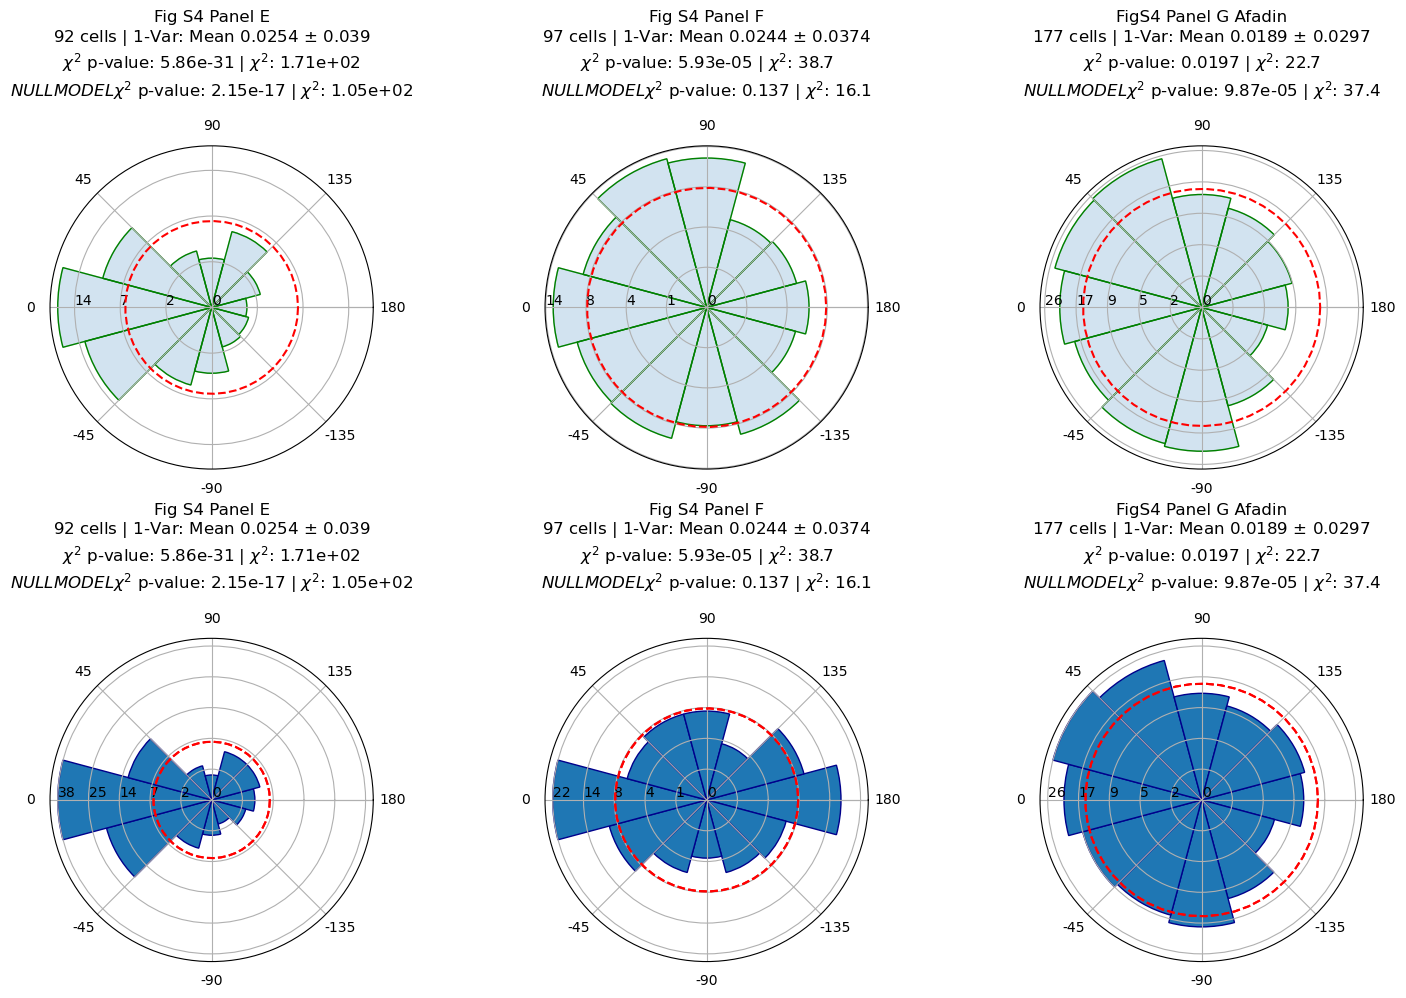

In [42]:
fig, axss = plt.subplots(2, 3, figsize=(15, 10), dpi=100, subplot_kw=dict(polar=True))

all_experiment_magnitudes = []

all_experiment_arrows = []
all_experiment_null_arrows = []

for experiment, axs in zip(data.keys(), axss.T):
    print(experiment)
    all_arrows = []
    all_sizes = []
    all_magnitudes = []

    all_arrows_null = []
    all_sizes_null = []
    all_magnitudes_null = []

    for subexp in data[experiment]["actin_arrows"].keys():
        arrows = data[experiment]["actin_arrows"][subexp]
        all_arrows.extend(arrows)
        # sizes = data[experiment]["actin_sizes"][subexp]
        sizes = np.ones(len(arrows))
        all_sizes.extend(sizes)
        magnitudes = data[experiment]["actin_magnitudes"][subexp]
        all_magnitudes.extend(magnitudes)

        all_arrows_null.extend(data_null[experiment]["null_arrows"][subexp])
        magnitudes_null = data_null[experiment]["null_magnitudes"][subexp]
        all_magnitudes_null.extend(magnitudes_null)
        all_sizes_null.extend(np.ones(len(magnitudes_null)))

    all_magnitudes = np.array(all_magnitudes)

    all_arrows = np.array(all_arrows)

    all_sizes = np.array(all_sizes)

    # print(f"Average variance: {np.mean(all_magnitudes):.2f} ± {np.std(all_magnitudes):.2f}")
    # print(f"Average variance over cutoff {np.mean(all_magnitudes[all_sizes > 0]):.2f} ± {np.std(all_magnitudes[all_sizes > 0]):.2f}")
    # print(" ")
    # all_arrows = np.array(all_arrows)

    all_arrows_null = np.array(all_arrows_null)
    all_sizes_null = np.array(all_sizes_null)
    all_magnitudes_null = np.array(all_magnitudes_null)

    for ax, tf in zip(axs, [True, False]):
        make_rose_plot(all_arrows, all_sizes, all_magnitudes, exclude_empty=False, fit = True, title = experiment, ax = ax, relative=np.pi, other =all_arrows_null,plotother = tf)

    all_experiment_magnitudes.append(all_magnitudes)
    all_experiment_arrows.append(all_arrows)
    all_experiment_null_arrows.append(all_arrows_null)

plt.tight_layout()
# save as pdf
plt.savefig("Fig S4 Panel EFG.pdf", bbox_inches='tight', dpi=300)
    
 

In [42]:
def unpack_experiments(all_angs):
    unpacked_angs = []
    for key in all_angs.keys():
        unpacked_angs.extend(all_angs[key])
    return np.array(unpacked_angs)
        

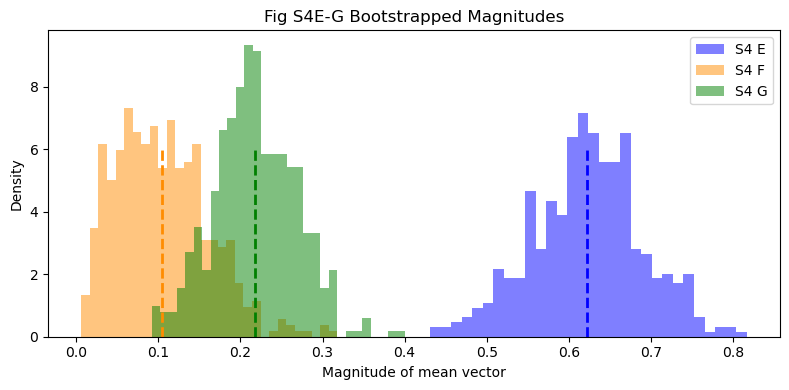

In [76]:
experiments = all_experiment_arrows
experiments_null = all_experiment_null_arrows

dats = []

iii_hack = 0

fig = plt.figure(figsize=(8, 4), dpi=100)
ax = fig.add_subplot(111, polar=False)

all_magnitudes = []
all_names = ["S4 E", "S4 F", "S4 G",]


for exp, exp_null in zip(experiments, experiments_null):
    # unpacked_exp = unpack_experiments(exp["actin_arrows"])
    # unpacked_null = unpack_experiments(exp_null["null_arrows"])
    unpacked_exp = exp
    unpacked_null = exp_null
    angles = get_angles(unpacked_exp)/180*np.pi
    
    unit_vectors = np.array([np.cos(angles), np.sin(angles)]).T


    
    unpacked_null = (unpacked_null/np.linalg.norm(unpacked_null, axis=1)[:, None]).reshape(len(angles), -1, 2)

    boot_magnitudes = []
    nulls = []
    for i in range(500):
        indices = np.random.choice(len(angles), size = len(angles), replace=True)

        boot_unit_vectors = unit_vectors[indices]


        mean_vector = np.mean(boot_unit_vectors, axis=0)
        magnitude_of_mean = np.linalg.norm(mean_vector)
        boot_magnitudes.append(magnitude_of_mean)

        innn = np.mean(unpacked_null[indices], axis = (0,1))

        nul = np.linalg.norm(innn)
        nulls.append(nul)

    color = ["blue", "darkorange", "green"][iii_hack]
    name = all_names[iii_hack]

    boot_magnitudes = np.array(boot_magnitudes)
    nulls = np.array(nulls)

    ax.hist(boot_magnitudes, bins=30, density=True, alpha=0.5, color=color, label=name)
    # plt.xlim(-0.1,0.7)
    
    ax.vlines(np.mean(boot_magnitudes), 0, 6, color=color, linestyle='dashed', linewidth=2)
    dats.append(boot_magnitudes)

    # make inset plot in the histogram
    # inset_ax = fig.add_axes([0.2, 0.2, 0.25, 0.25], polar=True)
    # inset_ax.set_xticks([])
    # inset_ax.set_yticks([])

    # make_rose_plot(unpacked_exp, unpack_experiments(exp["actin_magnitudes"]), np.ones_like(unpacked_exp), exclude_empty=True, fit = False, title = "Fig7D Diversin quantification", ax = inset_ax, relative=np.pi, other =all_actin_arrows_null)
    # inset_ax.set_title("")


    all_magnitudes.append(boot_magnitudes)
    
    iii_hack += 1


ax.set_xlabel("Magnitude of mean vector")
ax.set_ylabel("Density")
ax.set_title("Fig S4E-G Bootstrapped Magnitudes")
ax.legend()
plt.tight_layout()
plt.show()

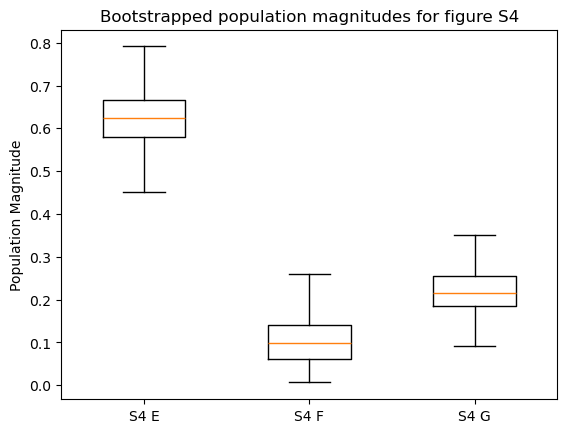

Mean of S4 E: 0.623 
Mean of S4 F: 0.105 
Mean of S4 G: 0.218 


In [81]:
plt.boxplot(all_magnitudes, tick_labels = all_names, showfliers = False, widths = 0.5)
plt.ylabel("Population Magnitude")
plt.title("Bootstrapped population magnitudes for figure S4")
# save as pdf
plt.savefig("FigS4_bootstrapped_magnitude_boxplot.pdf", bbox_inches='tight', dpi=300)
plt.show()


from scipy.stats import ttest_ind

for i in range(len(all_magnitudes)):
    print(f"Mean of {all_names[i]}: {np.mean(all_magnitudes[i]):.3f} ")
    for j in range(i+1, len(dats)):
        ...
        # print(f"t-test between {all_names[i]} and {all_names[j]}:")
        # print(ttest_ind(all_magnitudes[i], all_magnitudes[j], equal_var=False,))
# mak

([<matplotlib.axis.XTick at 0x11de48a81d0>,
 [Text(0, 0, 'Fig S4 Panel E'),
  Text(1, 0, 'Fig S4 Panel F'),
  Text(2, 0, 'FigS4 Panel G Afadin')])

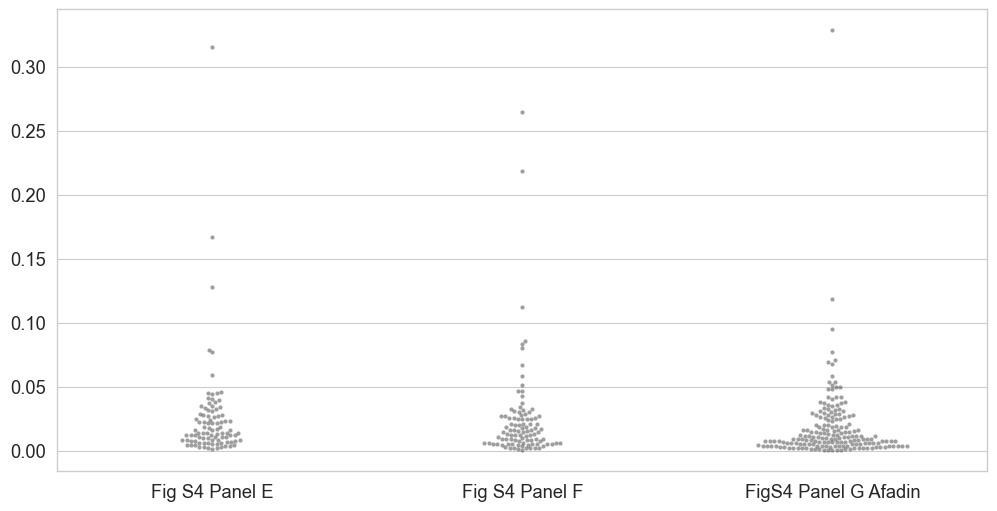

In [45]:
import seaborn as sns

# make beeswarm plot
plt.figure(figsize=(12, 6), dpi=100)
sns.set_theme(style="whitegrid")

# sns.set_palette("colorblind")
sns.set_context("paper", font_scale=1.5)

xs = 0
for experiment_magnitudes in all_experiment_magnitudes:

    sns.swarmplot(y=experiment_magnitudes, x = np.ones_like(experiment_magnitudes)*xs, color=".25", alpha=0.5, size=3)
    xs += 1

plt.xticks([0, 1, 2], data.keys())


# Fig R2-4 Myosin

In [46]:
data_actin = import_data(path + "Fig R2-4 Myosin", "actin", False)
data_adip = import_data(path + "Fig R2-4 Myosin", "protein", False)
data_actin_null = import_data(path + "Fig R2-4 Myosin", "actin_null", False)


Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R2-4 Myosin\results\actin
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R2-4 Myosin\results\protein
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R2-4 Myosin\results\actin_null


rotating adip arrows
other_non_density_hist [2527 1834  707  346  289  968 1137  942  546  408  816 1280]
59 11800
['0', '1', '4', '8', '13', '20']
p-value: 6.142681915741877e-13 | chi2: 81.96569537444785 | N: 12
[ 1  3  2  1  1  8 20 15  3  1  3  1]
['0', '1', '3', '6', '11', '17']
p-value: 2.6284192732528205e-08 | chi2: 57.55555555555556 | N: 12
[ 2  1  1  3  4 13 16  4  3  2  4  1]
other_non_density_hist [2527 1834  707  346  289  968 1137  942  546  408  816 1280]
59 11800
['0', '1', '4', '8', '13', '20']
p-value: 6.142681915741877e-13 | chi2: 81.96569537444785 | N: 12
[ 1  3  2  1  1  8 20 15  3  1  3  1]
['0', '1', '3', '6', '11', '17']
p-value: 2.6284192732528205e-08 | chi2: 57.55555555555556 | N: 12
[ 2  1  1  3  4 13 16  4  3  2  4  1]


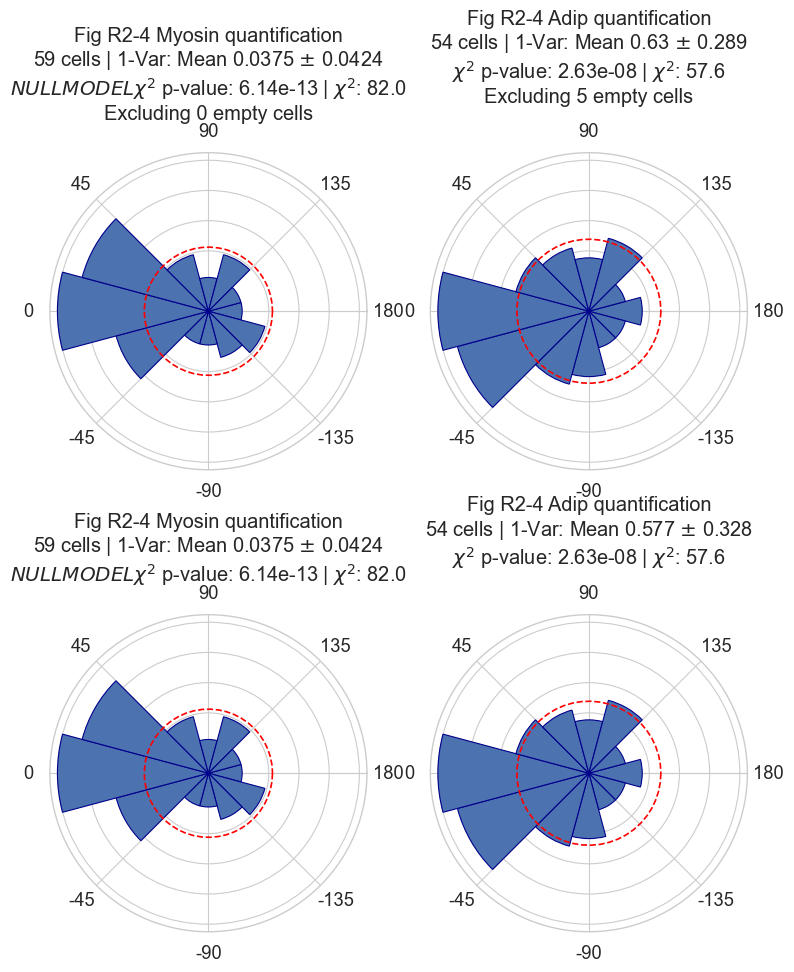

In [47]:
all_actin_arrows = []
all_actin_magnitudes = []
all_actin_sizes = []
all_adip_arrows = []
all_adip_magnitudes = []
all_adip_sizes = []

all_null_arrows = []

for experiment in data_actin["actin_arrows"].keys():
    
    rotate_offset = 0.0
    if "emb2" in experiment:
        rotate_offset = 45

    arrows = data_actin["actin_arrows"][experiment]
    magnitudes = data_actin["actin_magnitudes"][experiment]
    sizes = np.ones(len(arrows)) 

    null_arrows = data_actin_null["null_arrows"][experiment]
    


    # rotate arrows
    rotation_matrix = np.array([[np.cos(np.deg2rad(rotate_offset)), -np.sin(np.deg2rad(rotate_offset))] ,
                                [np.sin(np.deg2rad(rotate_offset)), np.cos(np.deg2rad(rotate_offset))]])
    arrows = np.array([rotation_matrix @ arrow for arrow in arrows])
    
    all_actin_arrows.extend(arrows)
    all_actin_magnitudes.extend(magnitudes)
    all_actin_sizes.extend(sizes)

    null_arrows = np.array([rotation_matrix @ arrow for arrow in null_arrows])
    all_null_arrows.extend(null_arrows)



for experiment in data_adip["protein_arrows"].keys():
    arrows = data_adip["protein_arrows"][experiment]
    magnitudes = data_adip["protein_magnitudes"][experiment]
    sizes = data_adip["protein_sizes"][experiment]

        
    rotate_offset = 0.0
    if "emb2" in experiment:
        rotate_offset = 45
        print("rotating adip arrows")

    rotation_matrix = np.array([[np.cos(np.deg2rad(rotate_offset)), -np.sin(np.deg2rad(rotate_offset))] ,
                                [np.sin(np.deg2rad(rotate_offset)), np.cos(np.deg2rad(rotate_offset))]])
    arrows = np.array([rotation_matrix @ arrow for arrow in arrows])
    


    all_adip_arrows.extend(arrows)
    all_adip_magnitudes.extend(magnitudes)
    all_adip_sizes.extend(sizes)

all_actin_arrows = np.array(all_actin_arrows)
all_actin_magnitudes = np.array(all_actin_magnitudes)
all_actin_sizes = np.array(all_actin_sizes)

all_adip_arrows = np.array(all_adip_arrows)
all_adip_magnitudes = np.array(all_adip_magnitudes)
all_adip_sizes = np.array(all_adip_sizes)

all_null_arrows = np.array(all_null_arrows)

fig, axs = plt.subplots(2, 2, figsize=(9, 11), dpi=100, subplot_kw=dict(polar=True))
for tf, ax in zip([True, False], axs):
    make_rose_plot(all_actin_arrows, all_actin_sizes, all_actin_magnitudes, exclude_empty=tf, fit = False, title = "Fig R2-4 Myosin quantification", ax = ax[0], relative=np.pi, other =all_null_arrows)
    make_rose_plot(all_adip_arrows, all_adip_sizes, all_adip_magnitudes, exclude_empty=tf, fit = True, title = "Fig R2-4 Adip quantification", ax = ax[1], relative=np.pi)

mean m: 0.74 +/- 0.17
mean b: 35.48 +/- 27.65
mean r: 0.59 +/- 0.12


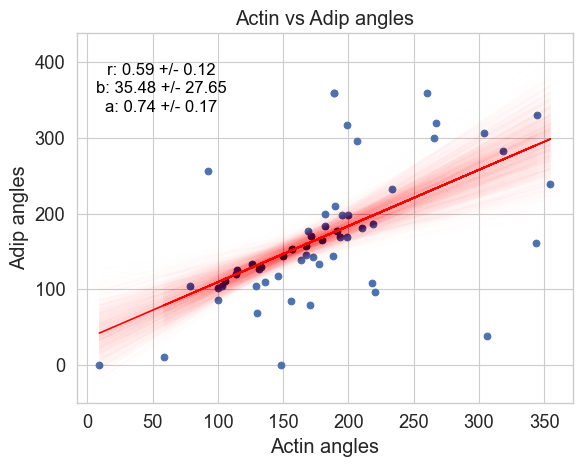

mean m: -2.15 +/- 2.13
mean b: 0.64 +/- 0.08
mean r: -0.14 +/- 0.13


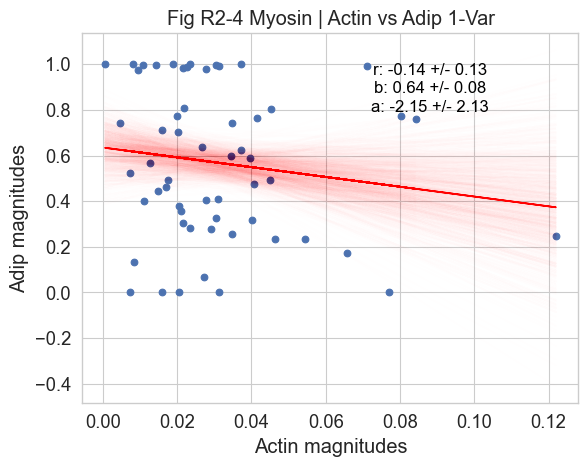

In [48]:
all_act_angles = []
all_prot_angles = []
all_actin_magnitudes = []
all_protein_magnitudes = []
for experiment in data_actin["actin_arrows"].keys():
    actin_ids = data_actin["actin_ids"][experiment] 
    protein_ids = data_adip["protein_ids"][experiment]


    for id in actin_ids:
        if id == 0:
            continue
        if not id in protein_ids:
            continue

        act_ang = get_angles(data_actin["actin_arrows"][experiment][actin_ids == id])
        protein_ang = get_angles(data_adip["protein_arrows"][experiment][protein_ids == id])
        all_act_angles.extend(act_ang)
        all_prot_angles.extend(protein_ang)

        all_actin_magnitudes.extend(data_actin["actin_magnitudes"][experiment][actin_ids == id])
        all_protein_magnitudes.extend(data_adip["protein_magnitudes"][experiment][protein_ids == id])





all_act_angles = np.array(all_act_angles)
all_prot_angles = np.array(all_prot_angles)
all_prot_angles[(all_prot_angles < 20)*(all_act_angles > 360/2)] = 360 + all_prot_angles[(all_prot_angles < 20)*(all_act_angles > 360/2)]
all_prot_angles[(all_prot_angles > 360-20)*(all_act_angles < 360/2)] = 360 - all_prot_angles[(all_prot_angles > 360-20)*(all_act_angles < 360/2)]

plt.scatter(all_act_angles, all_prot_angles,)
plt.xlabel("Actin angles")
plt.ylabel("Adip angles")
plt.title(f"Actin vs Adip angles")

# bootstrapping
corrcoeffs = np.zeros(1000)
asbs = np.zeros((1000,2))
for i in range(1000):
    indices = np.random.choice(len(all_act_angles), size = len(all_act_angles), replace=True)
    act_ang = all_act_angles[indices]
    prot_ang = all_prot_angles[indices]

    # linear fit
    m, b = np.polyfit(act_ang, prot_ang, 1)
    corrcoeff = np.corrcoef(act_ang, prot_ang)[0, 1]
    corrcoeffs[i] = corrcoeff
    asbs[i,0] = m
    asbs[i,1] = b
    plt.plot(all_act_angles, m*np.array(all_act_angles)+b, color = "red", alpha = 0.005)


m = np.mean(asbs[:,0])
b = np.mean(asbs[:,1])
std_m = np.std(asbs[:,0])
std_b = np.std(asbs[:,1])
corrcoeff = np.mean(corrcoeffs)
std_corrcoeff = np.std(corrcoeffs)
print(f"mean m: {m:.2f} +/- {std_m:.2f}")
print(f"mean b: {b:.2f} +/- {std_b:.2f}")
print(f"mean r: {corrcoeff:.2f} +/- {std_corrcoeff:.2f}")

plt.plot(all_act_angles, m*np.array(all_act_angles)+b, color = "red")
plt.text(0.17, 0.8, f"a: {m:.2f} +/- {std_m:.2f}", ha = "center", va = "center", transform=plt.gca().transAxes, fontsize = 12, color = "black")
plt.text(0.17, 0.85, f"b: {b:.2f} +/- {std_b:.2f}", ha = "center", va = "center", transform=plt.gca().transAxes, fontsize = 12, color = "black")
plt.text(0.17, 0.9, f"r: {corrcoeff:.2f} +/- {std_corrcoeff:.2f}", ha = "center", va = "center", transform=plt.gca().transAxes, fontsize = 12, color = "black")
plt.show()



all_actin_magnitudes = np.array(all_actin_magnitudes)
all_protein_magnitudes = np.array(all_protein_magnitudes)
plt.scatter(all_actin_magnitudes, all_protein_magnitudes,)

corrcoeffs = np.zeros(1000)
asbs = np.zeros((1000,2))
for i in range(1000):
    indices = np.random.choice(len(all_actin_magnitudes), size = len(all_actin_magnitudes), replace=True)
    act_err = all_actin_magnitudes[indices]
    prot_err = all_protein_magnitudes[indices]

    # linear fit
    m, b = np.polyfit(act_err, prot_err, 1)
    corrcoeff = np.corrcoef(act_err, prot_err)[0, 1]
    corrcoeffs[i] = corrcoeff
    asbs[i,0] = m
    asbs[i,1] = b
    plt.plot(all_actin_magnitudes, m*np.array(all_actin_magnitudes)+b, color = "red", alpha = 0.005)


m = np.mean(asbs[:,0])
b = np.mean(asbs[:,1])
std_m = np.std(asbs[:,0])
std_b = np.std(asbs[:,1])
corrcoeff = np.mean(corrcoeffs)
std_corrcoeff = np.std(corrcoeffs)
print(f"mean m: {m:.2f} +/- {std_m:.2f}")
print(f"mean b: {b:.2f} +/- {std_b:.2f}")
print(f"mean r: {corrcoeff:.2f} +/- {std_corrcoeff:.2f}")

plt.plot(all_actin_magnitudes, m*np.array(all_actin_magnitudes)+b, color = "red")
plt.text(0.7, 0.8, f"a: {m:.2f} +/- {std_m:.2f}", ha = "center", va = "center", transform=plt.gca().transAxes, fontsize = 12, color = "black")
plt.text(0.7, 0.85, f"b: {b:.2f} +/- {std_b:.2f}", ha = "center", va = "center", transform=plt.gca().transAxes, fontsize = 12, color = "black")
plt.text(0.7, 0.9, f"r: {corrcoeff:.2f} +/- {std_corrcoeff:.2f}", ha = "center", va = "center", transform=plt.gca().transAxes, fontsize = 12, color = "black")


# print(np.mean(all_actin_magnitudes), np.mean(all_protein_magnitudes))
plt.xlabel("Actin magnitudes")
plt.ylabel("Adip magnitudes")
plt.title(f"Fig R2-4 Myosin | Actin vs Adip 1-Var")
plt.show()
    

# Fig R2-5

## "Corner" point

In [49]:
protein_data = import_data(path + "Fig R2-5 (old FigS1)", "protein", False)
corner_data = import_data(path + "Fig R2-5 (old FigS1)", "corner", False)

Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R2-5 (old FigS1)\results\protein
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R2-5 (old FigS1)\results\corner


## Distance point

In [50]:
protein_data.keys()

dict_keys(['protein_arrows', 'protein_ids', 'protein_positions', 'protein_sizes', 'protein_magnitudes'])

In [51]:
protein_data["protein_arrows"].keys()

dict_keys(['Fig R2-5 Fig-S1  Rep-I 100pg GFP-msd150pg myrBFP st-11.5w emb1', 'Fig R2-5 Fig-S1  Rep-I 100pg GFP-msd150pg myrBFP st-11.5w emb4'])

In [52]:
import os

In [53]:
masks = {}



for m in os.listdir("all_data_structured/" + path + "Fig R2-5 (old FigS1)/masks/"):
    masks[m.replace("+","")[5:-4]] = np.load("all_data_structured/" + path + "Fig R2-5 (old FigS1)/masks/" + m)

wounds = {}
for w in os.listdir("all_data_structured/" + path + "Fig R2-5 (old FigS1)/wounds/"):
    wounds[w.replace("+","")[6:-4]] = plt.imread("all_data_structured/" + path + "Fig R2-5 (old FigS1)/wounds/" + w)

In [54]:
mask = masks["Fig R2-5 Fig-S1  Rep-I 100pg GFP-msd150pg myrBFP st-11.5w emb4"]




In [55]:
wound_img_path  = ("all_data_structured/" + path + "Fig R2-5 (old FigS1)/wounds/wound_Fig R2-5 Fig-S1  Rep-I 100pg GFP-msd1+50pg myrBFP st-11.5w emb4.png")

wound = plt.imread(wound_img_path)

In [56]:
to_wound_dists = {}

for experiment in masks.keys():
    print(experiment)
    to_wound_dists[experiment] = get_shortest_distances(masks[experiment], wounds[experiment])


Fig R2-5 Fig-S1  Rep-I 100pg GFP-msd150pg myrBFP st-11.5w emb1
wound_positions (82255, 2)
segmented_cells (1214, 919)
Fig R2-5 Fig-S1  Rep-I 100pg GFP-msd150pg myrBFP st-11.5w emb4
wound_positions (51264, 2)
segmented_cells (1276, 960)


In [57]:
for experiment in protein_data["protein_angles"].keys():
    siz = protein_data["protein_sizes"][experiment]
    ang = protein_data["protein_angles"][experiment]
    print("")
    print(experiment)
    # print(np.average(siz))
    # plt.hist(siz[siz < 600], bins = 120)
    # plt.show()
    # plt.hist(ang[siz > 20], bins = 30)
    # plt.show()
    print("Mean of sizable:")
    print(np.mean(ang[siz> 3]), "+/-", np.std(ang[siz > 3]))
    print("Mean of all:")
    print(np.mean(ang))
    print("Ratio of sizable:")
    print(np.mean(siz > 3)*100)

KeyError: 'protein_angles'

Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig R2-5 (old FigS1)\results\protein
Fig R2-5 Fig-S1  Rep-I 100pg GFP-msd150pg myrBFP st-11.5w emb1
id not in id_dists


C:\Users\jakob\AppData\Local\Temp\ipykernel_32628\3562336642.py:12: RuntimeWarning: invalid value encountered in divide
  arrows = arrows/arrow_lengths[:, np.newaxis]


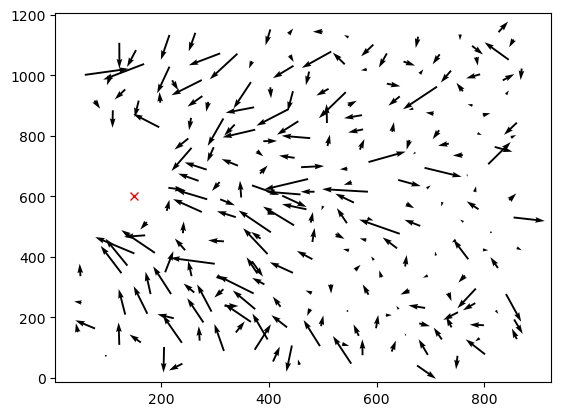

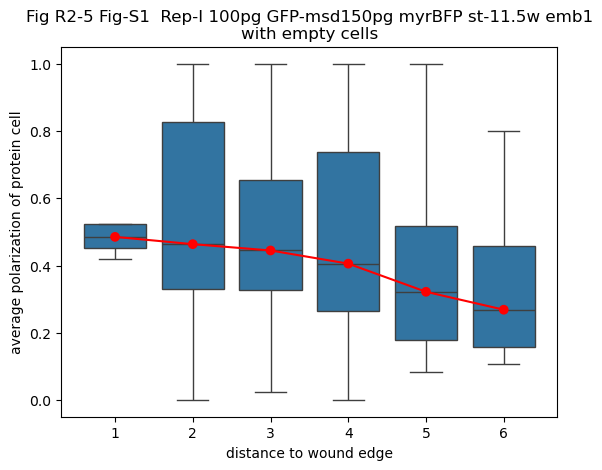

Fig R2-5 Fig-S1  Rep-I 100pg GFP-msd150pg myrBFP st-11.5w emb4
id not in id_dists
id not in id_dists
id not in id_dists
id not in id_dists


C:\Users\jakob\AppData\Local\Temp\ipykernel_32628\3562336642.py:12: RuntimeWarning: invalid value encountered in divide
  arrows = arrows/arrow_lengths[:, np.newaxis]


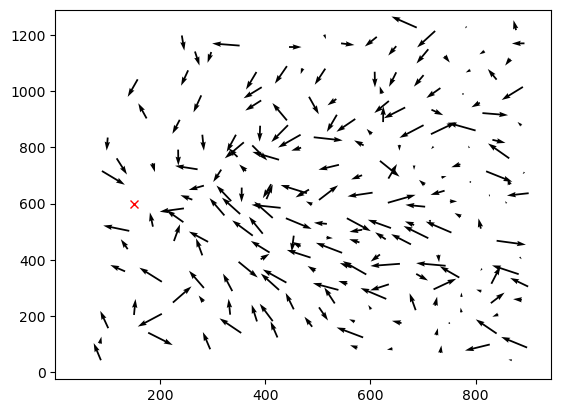

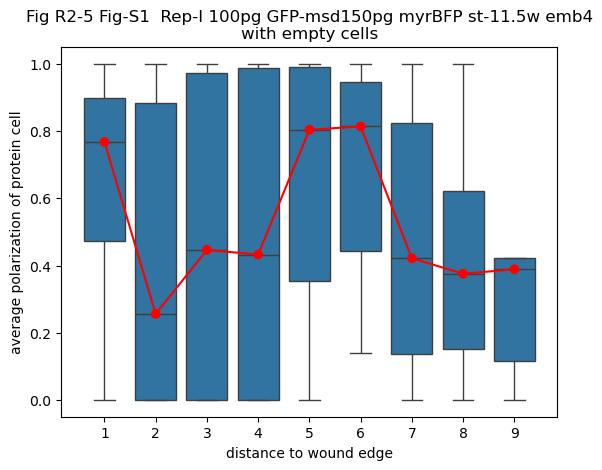

In [ ]:
protein_data = import_data(path + "Fig R2-5 (old FigS1)", "protein", False)

import seaborn as sns
wound = np.array([150., 600.])
for experiment in protein_data["protein_arrows"].keys():
    print(experiment)
    

    arrows = protein_data["protein_arrows"][experiment]
    arrow_lengths = np.linalg.norm(arrows, axis = 1)

    arrows = arrows/arrow_lengths[:, np.newaxis] 
    

    # remove arrows that are too short


    positions = protein_data["protein_positions"][experiment]
    distances = np.linalg.norm(positions - wound , axis = 1)

    # remove arrows that are too long
    # mask = lengths < 200
    # mask = np.ones(len(positions), dtype = bool)
    cutoff = -1
    mask =  protein_data["protein_sizes"][experiment] > cutoff
    arrows = arrows[mask]
    positions = positions[mask]
    magnitudes = protein_data["protein_magnitudes"][experiment][mask]
    distances = distances[mask]


    plt.quiver(positions[:,0], positions[:,1], arrows[:,0]*magnitudes, arrows[:,1]*magnitudes, scale_units = "xy")
    plt.plot(wound[0], wound[1], "x", c = "red")
    # bin the lengths for different distances
    # bins = np.linspace(distances.min(), distances.max(), 15)
    # digitized = np.digitize(distances, bins)

    # mean_lengths = np.zeros(len(bins)-1)
    # std_lengths = np.zeros(len(bins)-1)

    # for i in range(1, len(bins)):
    #     mean_lengths[i-1] = np.mean(lengths[digitized == i])
    #     std_lengths[i-1] = np.std(lengths[digitized == i])


    mask = masks[experiment]

    id_dists = to_wound_dists[experiment]
    dists =  []
    for pos in positions:
        id = int(masks[experiment][int(pos[1]), int(pos[0])])
        if (id in id_dists.keys()):
            dists.append(id_dists[id])
        else:
            print("id not in id_dists")
            dists.append(999)

    dists = np.array(dists)

    mean_magnitudes = []
    std_magnitudes = []
    unique_dists = np.unique(dists)
    for i in np.unique(dists):
        if i == 999:
            continue

        mean_magnitudes.append(np.median(magnitudes[dists == i]))
        std_magnitudes.append(np.std(magnitudes[dists == i]))
    mean_magnitudes = np.array(mean_magnitudes)
    std_magnitudes = np.array(std_magnitudes)
    plt.show()
    # plt.plot(unique_dists[unique_dists!=999], mean_magnitudes, '.')

    # make boxplot of the magnitudes for different distances
    plt.figure()
    sns.boxplot(x = dists[dists != 999], y = magnitudes[dists != 999], showfliers = False)
    # plt.errorbar(unique_dists[unique_dists!=999], mean_magnitudes, yerr = std_magnitudes, fmt = ".")
    plt.xlabel("distance to wound edge")
    plt.ylabel("average polarization of protein cell")
    sns.lineplot(x = unique_dists[unique_dists!=999]-1, y =mean_magnitudes, ls ="-", c = "red", zorder = 10)
    sns.scatterplot(x = unique_dists[unique_dists!=999]-1, y =mean_magnitudes, ls ="", c = "red", edgecolor = "red", zorder = 10)
    plt.title(experiment + "\nwith" + ("out" if cutoff == 0 else "") + " empty cells")
    plt.show()


# Fig 6

In [ ]:
dir = "Fig6 ADIP-Diversin wound polarity"
data_actin = import_data(path + dir, "actin", False)
data_adip = import_data(path + dir, "protein", False)
data_actin_null = import_data(path + dir, "actin_null", False)

Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig6 ADIP-Diversin wound polarity\results\actin
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig6 ADIP-Diversin wound polarity\results\protein
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig6 ADIP-Diversin wound polarity\results\actin_null


other_non_density_hist [2036 1180  705  606  708  988 1372 1036  717  575  601  976]
115 11500
['0', '2', '5', '11', '19', '30']
p-value: 7.719691594585408e-08 | chi2: 55.00926496512107 | N: 12
[ 8  6 11  8 14 17 29 11  3  5  1  2]
['0', '2', '6', '14', '24', '38']
p-value: 1.1526312744025741e-24 | chi2: 140.73831775700938 | N: 12
[ 4  3  2  5  9 21 37 15  5  3  1  2]
other_non_density_hist [2036 1180  705  606  708  988 1372 1036  717  575  601  976]
115 11500
['0', '2', '5', '11', '19', '30']
p-value: 7.719691594585408e-08 | chi2: 55.00926496512107 | N: 12
[ 8  6 11  8 14 17 29 11  3  5  1  2]
['0', '2', '6', '14', '24', '38']
p-value: 1.1526312744025741e-24 | chi2: 140.73831775700938 | N: 12
[ 4  3  2  5  9 21 37 15  5  3  1  2]


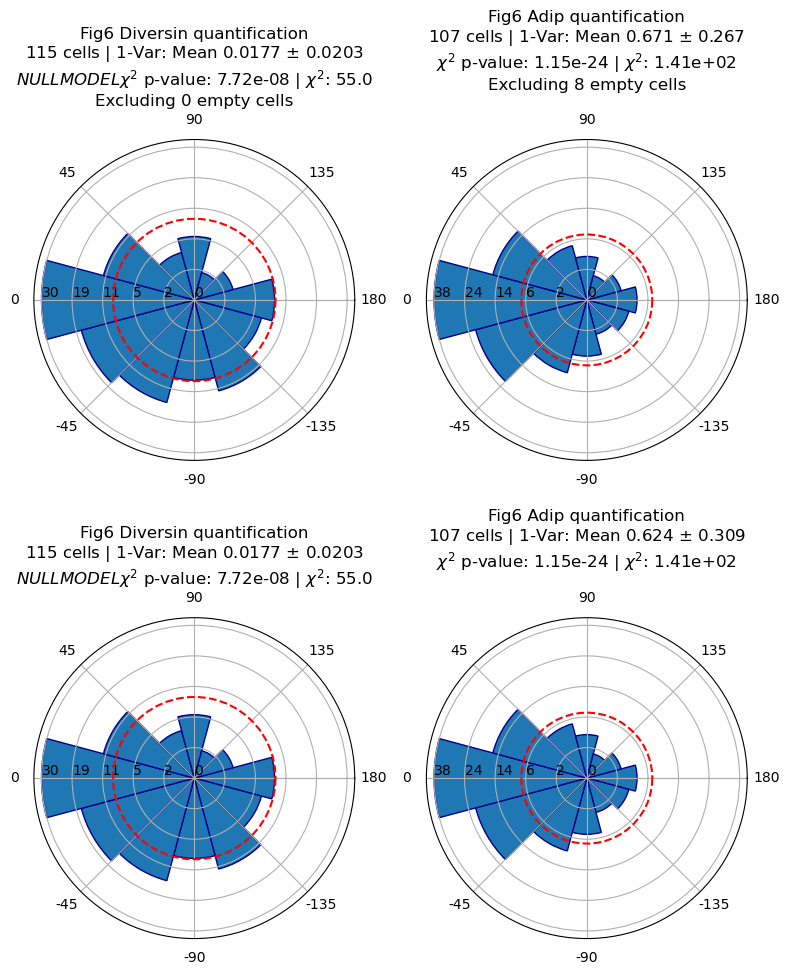

In [ ]:
all_actin_arrows = []
all_actin_magnitudes = []
all_actin_sizes = []
all_adip_arrows = []
all_adip_magnitudes = []
all_adip_sizes = []


all_actin_arrows_null = []

for experiment in data_actin["actin_arrows"].keys():
    arrows = data_actin["actin_arrows"][experiment]
    magnitudes = data_actin["actin_magnitudes"][experiment]
    sizes = np.ones(len(arrows)) 
    all_actin_arrows.extend(arrows)
    all_actin_magnitudes.extend(magnitudes)
    all_actin_sizes.extend(sizes)

for experiment in data_actin_null["null_arrows"].keys():
    arrows = data_actin_null["null_arrows"][experiment]
    all_actin_arrows_null.extend(arrows)




for experiment in data_adip["protein_arrows"].keys():
    arrows = data_adip["protein_arrows"][experiment]
    magnitudes = data_adip["protein_magnitudes"][experiment]
    sizes = data_adip["protein_sizes"][experiment]
    all_adip_arrows.extend(arrows)
    all_adip_magnitudes.extend(magnitudes)
    all_adip_sizes.extend(sizes)

all_actin_arrows = np.array(all_actin_arrows)
all_actin_magnitudes = np.array(all_actin_magnitudes)
all_actin_sizes = np.array(all_actin_sizes)

all_adip_arrows = np.array(all_adip_arrows)
all_adip_magnitudes = np.array(all_adip_magnitudes)
all_adip_sizes = np.array(all_adip_sizes)

all_actin_arrows_null = np.array(all_actin_arrows_null)

fig, axs = plt.subplots(2, 2, figsize=(8, 10), dpi=100, subplot_kw=dict(polar=True))
for tf, ax in zip([True, False], axs):
    make_rose_plot(all_actin_arrows, all_actin_sizes, all_actin_magnitudes, exclude_empty=tf, fit = False, title = "Fig6 Diversin quantification", ax = ax[0], relative=np.pi, other =all_actin_arrows_null)
    make_rose_plot(all_adip_arrows, all_adip_sizes, all_adip_magnitudes, exclude_empty=tf, fit = True, title = "Fig6 Adip quantification", ax = ax[1], relative=np.pi)

plt.tight_layout()

# Fig 7

## Panel A

In [25]:
dir = "Fig7 Stretch with Morphants/Fig7 PanelA ADIP-Stretch"
data_adip = import_data(path + dir, "protein", False)

panelA_arrows = import_data(path + dir, "actin", False)
panelA_null = import_data(path + dir, "actin_null", False)

Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelA ADIP-Stretch\results\protein
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelA ADIP-Stretch\results\actin
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelA ADIP-Stretch\results\actin_null


other_non_density_hist [1216  702  475  541  487  891  949  675  483  390  459  832]
88 8100
['0', '2', '5', '11', '19', '30']
p-value: 2.1078266477982575e-16 | chi2: 99.63636363636365 | N: 12
[10  4  3  3  3  8 29 17  5  1  2  3]
0.22766648314487756 0.2576318470511325
p-value: 5.957588032244862e-09 | chi2: 61.03281827506038 | N: 12
[10  4  3  3  3  8 29 17  5  1  2  3]
other_non_density_hist [1216  702  475  541  487  891  949  675  483  390  459  832]
88 8100
['0', '2', '5', '11', '19', '30']
p-value: 2.1078266477982575e-16 | chi2: 99.63636363636365 | N: 12
[10  4  3  3  3  8 29 17  5  1  2  3]
p-value: 5.957588032244862e-09 | chi2: 61.03281827506038 | N: 12
[10  4  3  3  3  8 29 17  5  1  2  3]


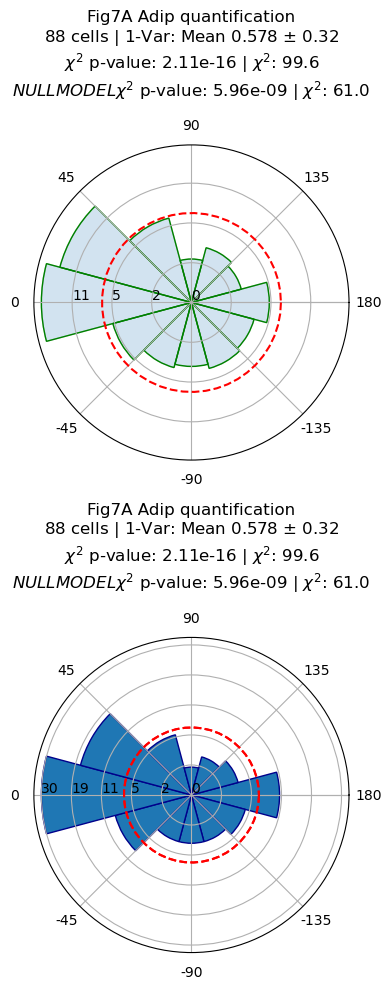

In [26]:
all_adip_arrows = []
all_adip_magnitudes = []
all_adip_sizes = []



for experiment in data_adip["protein_arrows"].keys():
    arrows = data_adip["protein_arrows"][experiment]
    magnitudes = data_adip["protein_magnitudes"][experiment]
    sizes = data_adip["protein_sizes"][experiment]
    all_adip_arrows.extend(arrows)
    all_adip_magnitudes.extend(magnitudes)
    all_adip_sizes.extend(sizes)

all_adip_arrows = np.array(all_adip_arrows)
all_adip_magnitudes = np.array(all_adip_magnitudes)
all_adip_sizes = np.array(all_adip_sizes)


fig, axs = plt.subplots(2, 1, figsize=(8, 10), dpi=100, subplot_kw=dict(polar=True))
for tf, ax in zip([True, False], axs):
    make_rose_plot(all_adip_arrows, all_adip_sizes, all_adip_magnitudes, exclude_empty=False, fit = True, title = "Fig7A Adip quantification", ax = ax, relative=np.pi, other =all_actin_arrows_null, plotother=tf)


plt.tight_layout()
# save as pdf
plt.savefig("Fig7A_ADIP_rose_plot.pdf", bbox_inches='tight', dpi=300)

## Panel B

In [27]:
dir = "Fig7 Stretch with Morphants/Fig7 PanelB ADIP+DivMO Stretch"
data_adip = import_data(path + dir, "protein", False)

panelB_arrows = import_data(path + dir, "actin", False)
panelB_null = import_data(path + dir, "actin_null", False)

Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelB ADIP+DivMO Stretch\results\protein
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelB ADIP+DivMO Stretch\results\actin
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelB ADIP+DivMO Stretch\results\actin_null


other_non_density_hist [1216  702  475  541  487  891  949  675  483  390  459  832]
69 8100
['0', '1', '3', '6', '9', '14']
p-value: 0.007869746783883507 | chi2: 25.434782608695652 | N: 12
[14  4  3  3  6  8  8  5  2  2  4 10]
0.2976317227337885 0.3111880193767233
p-value: 0.8360130631581829 | chi2: 6.52674358398223 | N: 12
[14  4  3  3  6  8  8  5  2  2  4 10]
other_non_density_hist [1216  702  475  541  487  891  949  675  483  390  459  832]
69 8100
['0', '1', '3', '6', '9', '14']
p-value: 0.007869746783883507 | chi2: 25.434782608695652 | N: 12
[14  4  3  3  6  8  8  5  2  2  4 10]
p-value: 0.8360130631581829 | chi2: 6.52674358398223 | N: 12
[14  4  3  3  6  8  8  5  2  2  4 10]


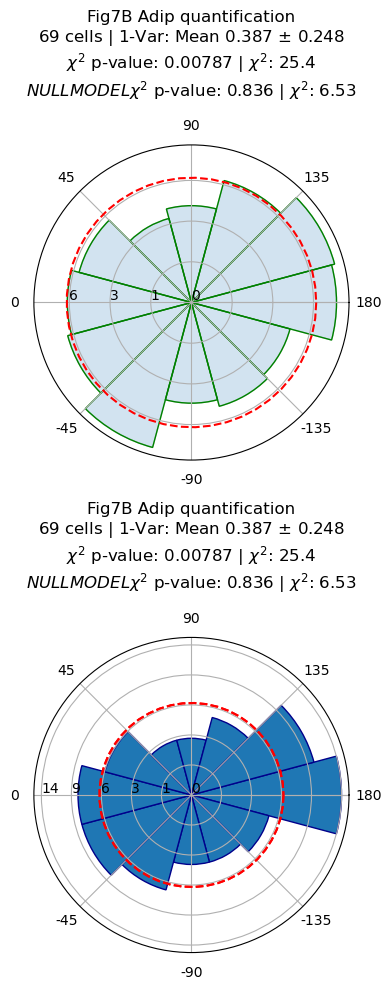

In [28]:
all_adip_arrows = []
all_adip_magnitudes = []
all_adip_sizes = []



for experiment in data_adip["protein_arrows"].keys():
    arrows = data_adip["protein_arrows"][experiment]
    magnitudes = data_adip["protein_magnitudes"][experiment]
    sizes = data_adip["protein_sizes"][experiment]
    all_adip_arrows.extend(arrows)
    all_adip_magnitudes.extend(magnitudes)
    all_adip_sizes.extend(sizes)

all_adip_arrows = np.array(all_adip_arrows)
all_adip_magnitudes = np.array(all_adip_magnitudes)
all_adip_sizes = np.array(all_adip_sizes)

all_actin_arrows_null = np.array(all_actin_arrows_null)

fig, axs = plt.subplots(2, 1, figsize=(8, 10), dpi=100, subplot_kw=dict(polar=True))
for tf, ax in zip([True, False], axs):
    make_rose_plot(all_adip_arrows, all_adip_sizes, all_adip_magnitudes, exclude_empty=False, fit = True, title = "Fig7B Adip quantification", ax = ax, relative=np.pi, other =all_actin_arrows_null, plotother=tf)

plt.tight_layout()
# save as pdf
plt.savefig("Fig7B_ADIP_rose_plot.pdf", bbox_inches='tight', dpi=300)

## Panel C

In [29]:
dir = "Fig7 Stretch with Morphants/Fig7 PanelC Div Stretch"
data_actin = import_data(path + dir, "actin", False)
data_actin_null = import_data(path + dir, "actin_null", False)

panelC_arrows = import_data(path + dir, "actin", False)
panelC_null = import_data(path + dir, "actin_null", False)


Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelC Div Stretch\results\actin
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelC Div Stretch\results\actin_null
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelC Div Stretch\results\actin
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelC Div Stretch\results\actin_null


other_non_density_hist [1216  702  475  541  487  891  949  675  483  390  459  832]
81 8100
['0', '1', '4', '7', '13', '20']
p-value: 1.6126477375308372e-08 | chi2: 58.70370370370371 | N: 12
[ 5  4  2  4  3 10 19 18  8  2  4  2]
0.25932454956668405 0.2772544444099943
p-value: 5.9662227943959126e-06 | chi2: 44.48891735410911 | N: 12
[ 5  4  2  4  3 10 19 18  8  2  4  2]
other_non_density_hist [1216  702  475  541  487  891  949  675  483  390  459  832]
81 8100
['0', '1', '4', '7', '13', '20']
p-value: 1.6126477375308372e-08 | chi2: 58.70370370370371 | N: 12
[ 5  4  2  4  3 10 19 18  8  2  4  2]
p-value: 5.9662227943959126e-06 | chi2: 44.48891735410911 | N: 12
[ 5  4  2  4  3 10 19 18  8  2  4  2]


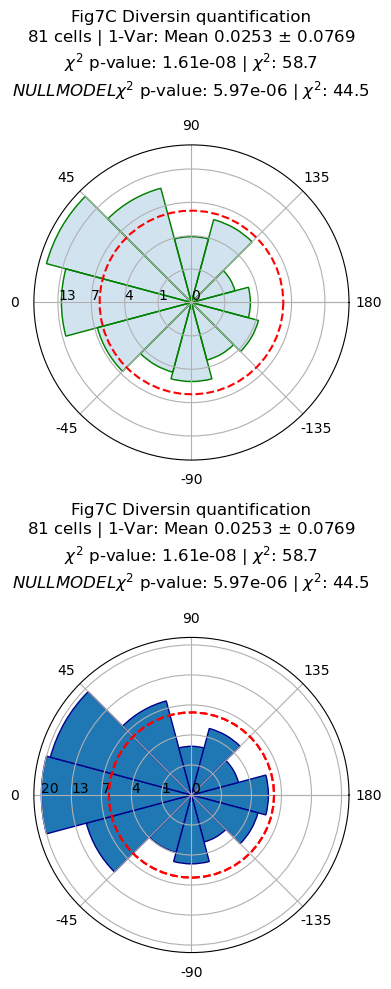

In [30]:
all_actin_arrows = []
all_actin_magnitudes = []
all_actin_sizes = []

all_actin_arrows_null = []

for experiment in data_actin["actin_arrows"].keys():
    arrows = data_actin["actin_arrows"][experiment]
    magnitudes = data_actin["actin_magnitudes"][experiment]
    sizes = np.ones(len(arrows)) 
    all_actin_arrows.extend(arrows)
    all_actin_magnitudes.extend(magnitudes)
    all_actin_sizes.extend(sizes)

for experiment in data_actin_null["null_arrows"].keys():
    arrows = data_actin_null["null_arrows"][experiment]
    all_actin_arrows_null.extend(arrows)




all_actin_arrows = np.array(all_actin_arrows)
all_actin_magnitudes = np.array(all_actin_magnitudes)
all_actin_sizes = np.array(all_actin_sizes)

all_actin_arrows_null = np.array(all_actin_arrows_null)

fig, axs = plt.subplots(2, 1, figsize=(8, 10), dpi=100, subplot_kw=dict(polar=True))
for tf, ax in zip([True, False], axs):
    make_rose_plot(all_actin_arrows, all_actin_sizes, all_actin_magnitudes, exclude_empty=False, fit = True, title = "Fig7C Diversin quantification", ax = ax, relative=np.pi, other =all_actin_arrows_null, plotother = tf)

plt.tight_layout()
# save as pdf
plt.savefig("Fig7C_Diversin_rose_plot.pdf", bbox_inches='tight', dpi=300)

## Panel D

In [31]:
dir = "Fig7 Stretch with Morphants/Fig7 PanelD Div+ADIPMO stretch"
data_actin = import_data(path + dir, "actin", False)
data_actin_null = import_data(path + dir, "actin_null", False)

panelD_arrows = import_data(path + dir, "actin", False)
panelD_null = import_data(path + dir, "actin_null", False)


Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelD Div+ADIPMO stretch\results\actin
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelD Div+ADIPMO stretch\results\actin_null
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelD Div+ADIPMO stretch\results\actin
Looking at folder:
all_data_structured\From Satheeja to Jakob/Fig7 Stretch with Morphants/Fig7 PanelD Div+ADIPMO stretch\results\actin_null


other_non_density_hist [ 918  667  574  397  384  695 1101  702  377  283  317  585]
70 7000
['0', '1', '3', '6', '9', '14']
p-value: 1.9358266290612495e-06 | chi2: 47.25714285714287 | N: 12
[14  1  1  1  4  3 14  9  1  5  6 11]
0.269397985023449 0.2920248340475935
p-value: 0.003391136638391317 | chi2: 27.868284990335752 | N: 12
[14  1  1  1  4  3 14  9  1  5  6 11]
other_non_density_hist [ 918  667  574  397  384  695 1101  702  377  283  317  585]
70 7000
['0', '1', '3', '6', '9', '14']
p-value: 1.9358266290612495e-06 | chi2: 47.25714285714287 | N: 12
[14  1  1  1  4  3 14  9  1  5  6 11]
p-value: 0.003391136638391317 | chi2: 27.868284990335752 | N: 12
[14  1  1  1  4  3 14  9  1  5  6 11]


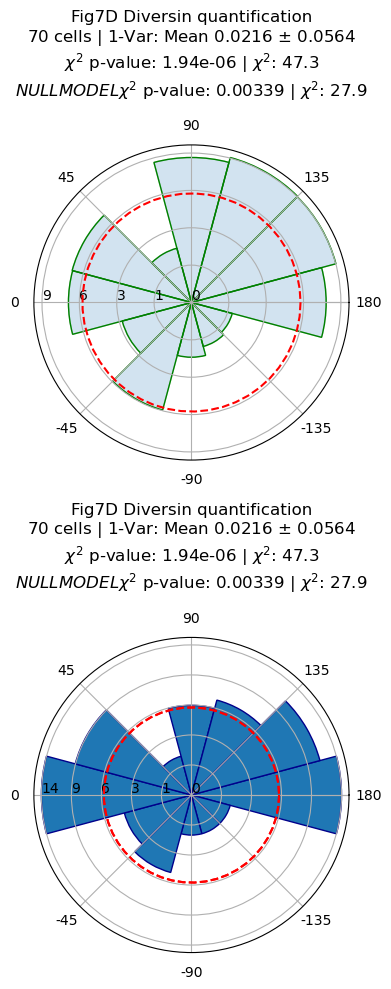

In [32]:
all_actin_arrows = []
all_actin_magnitudes = []
all_actin_sizes = []

all_actin_arrows_null = []

for experiment in data_actin["actin_arrows"].keys():
    arrows = data_actin["actin_arrows"][experiment]
    magnitudes = data_actin["actin_magnitudes"][experiment]
    sizes = np.ones(len(arrows)) 
    all_actin_arrows.extend(arrows)
    all_actin_magnitudes.extend(magnitudes)
    all_actin_sizes.extend(sizes)

for experiment in data_actin_null["null_arrows"].keys():
    arrows = data_actin_null["null_arrows"][experiment]
    all_actin_arrows_null.extend(arrows)




all_actin_arrows = np.array(all_actin_arrows)
all_actin_magnitudes = np.array(all_actin_magnitudes)
all_actin_sizes = np.array(all_actin_sizes)

all_actin_arrows_null = np.array(all_actin_arrows_null)

fig, axs = plt.subplots(2, 1, figsize=(8, 10), dpi=100, subplot_kw=dict(polar=True))
for tf, ax in zip([True, False], axs):
    make_rose_plot(all_actin_arrows, all_actin_sizes, all_actin_magnitudes, exclude_empty=False, fit = True, title = "Fig7D Diversin quantification", ax = ax, relative=np.pi, other =all_actin_arrows_null, plotother=tf)

plt.tight_layout()
# save as pdf
plt.savefig("Fig7D_Diversin_rose_plot.pdf", bbox_inches='tight', dpi=300)

## Compare the panels using extended boot-strapping

In [ ]:
def unpack_experiments(all_angs):
    unpacked_angs = []
    for key in all_angs.keys():
        unpacked_angs.extend(all_angs[key])
    return np.array(unpacked_angs)
        

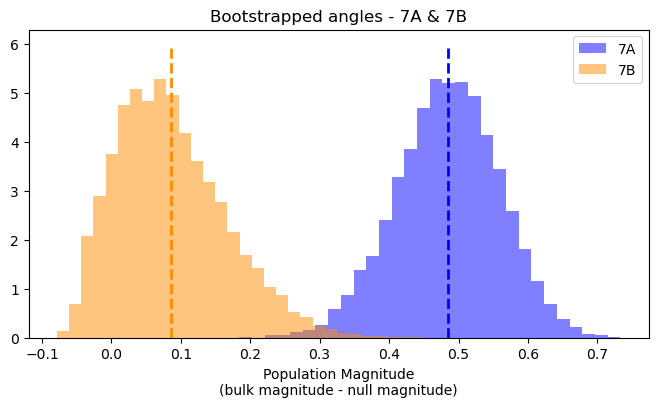

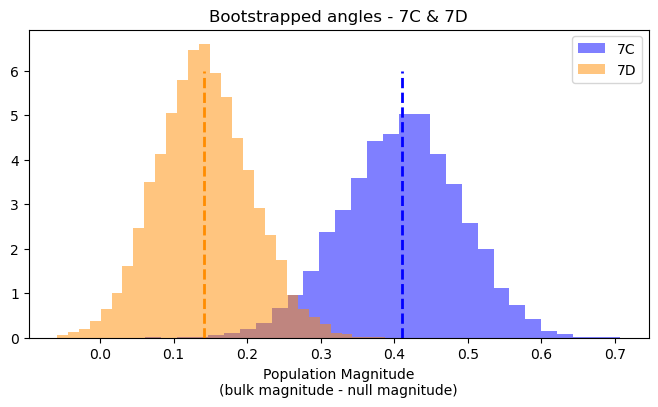

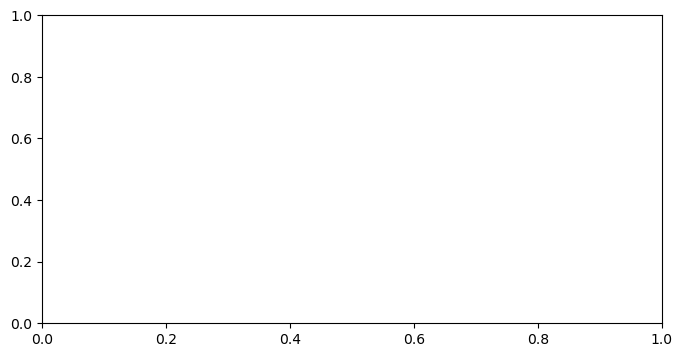

In [69]:
experiments = [panelA_arrows, panelB_arrows, panelC_arrows, panelD_arrows]
experiments_null = [panelA_null, panelB_null, panelC_null, panelD_null]

dats = []

iii_hack = 0

fig = plt.figure(figsize=(8, 4), dpi=100)
ax = fig.add_subplot(111, polar=False)

all_magnitudes = []
all_names = ["7A", "7B", "7C", "7D"]


for exp, exp_null in zip(experiments, experiments_null):
    
    unpacked_exp = unpack_experiments(exp["actin_arrows"])
    unpacked_null = unpack_experiments(exp_null["null_arrows"])

    angles = get_angles(unpacked_exp)/180*np.pi
    
    unit_vectors = np.array([np.cos(angles), np.sin(angles)]).T


    
    unpacked_null = (unpacked_null/np.linalg.norm(unpacked_null, axis=1)[:, None]).reshape(len(angles), -1, 2)

    boot_magnitudes = []
    nulls = []
    for i in range(10000):
        indices = np.random.choice(len(angles), size = len(angles), replace=True)

        boot_unit_vectors = unit_vectors[indices]


        mean_vector = np.mean(boot_unit_vectors, axis=0)
        magnitude_of_mean = np.linalg.norm(mean_vector)
        boot_magnitudes.append(magnitude_of_mean)

        innn = np.mean(unpacked_null[indices], axis = (0,1))

        nul = np.linalg.norm(innn)
        nulls.append(nul)

    color = ["blue", "darkorange"][iii_hack%2]
    name = all_names[iii_hack]

    boot_magnitudes = np.array(boot_magnitudes)
    nulls = np.array(nulls)

    ax.hist(boot_magnitudes - nulls, bins=30, density=True, alpha=0.5, color=color, label=name)
    # plt.xlim(-0.1,0.7)
    
    ax.vlines(np.mean(boot_magnitudes - nulls), 0, 6, color=color, linestyle='dashed', linewidth=2)
    dats.append(boot_magnitudes - nulls)

    # make inset plot in the histogram
    # inset_ax = fig.add_axes([0.2, 0.2, 0.25, 0.25], polar=True)
    # inset_ax.set_xticks([])
    # inset_ax.set_yticks([])

    # make_rose_plot(unpacked_exp, unpack_experiments(exp["actin_magnitudes"]), np.ones_like(unpacked_exp), exclude_empty=True, fit = False, title = "Fig7D Diversin quantification", ax = inset_ax, relative=np.pi, other =all_actin_arrows_null)
    # inset_ax.set_title("")

    if iii_hack%2 == 1:
        title = ["7A & 7B", "7C & 7D"][iii_hack//2]
        ax.set_title(f"Bootstrapped angles - {title}")
        ax.legend()
        ax.set_xlabel("Population Magnitude\n(bulk magnitude - null magnitude)")
        plt.show()
        fig = plt.figure(figsize=(8, 4), dpi=100)
        ax = fig.add_subplot(111, polar=False)

    all_magnitudes.append(boot_magnitudes)
    
    iii_hack += 1




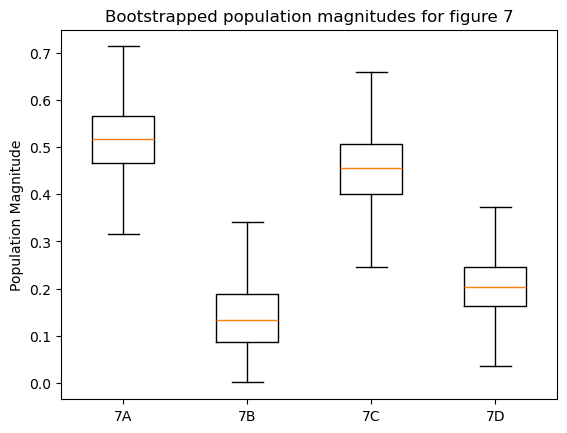

Mean of 7A: 0.514
Mean of 7B: 0.143
Mean of 7C: 0.454
Mean of 7D: 0.206


In [75]:
plt.boxplot(all_magnitudes, tick_labels = ["7A", "7B", "7C", "7D"], showfliers = False, widths = 0.5)
plt.ylabel("Population Magnitude")
plt.title("Bootstrapped population magnitudes for figure 7")

# plt.plot(1.5, 0.7, "*", c ="k" )
# plt.plot(3.5, 0.7, "*", c ="k" )

# save as pdf
plt.savefig("Fig7_bootstrapped_magnitude_boxplot.pdf", bbox_inches='tight', dpi=300)
plt.show()


from scipy.stats import ttest_ind

for i in range(len(dats)):
    print(f"Mean of {all_names[i]}: {np.mean(all_magnitudes[i]):.3f}")
    for j in range(i+1, len(dats)):
        ...
        # print(f"t-test between {i} and {j}:")
        # print(ttest_ind(all_magnitudes[i], all_magnitudes[j], equal_var=False,))
# mak

Population Magnitude:

$B = |\vec{P}|-|\vec{N}|=|\sum_{i} \hat{p_i}| - |\sum_i\left<\hat{n_i}\right>|$  

where $p_i$ is protein vector for cell i and $\left<\hat{n_i}\right>$ is the mean of a number (200) randomly reshuffled (null-model) protein vectors for random subsampled cells i  $\in$ Bootstrap

In [ ]:
# t-test the means



t-test between 0 and 1:
TtestResult(statistic=np.float64(373.12146190874813), pvalue=np.float64(0.0), df=np.float64(19969.030348535085))
t-test between 0 and 2:
TtestResult(statistic=np.float64(68.87750549002892), pvalue=np.float64(0.0), df=np.float64(19898.987345475965))
t-test between 0 and 3:
TtestResult(statistic=np.float64(354.964597297969), pvalue=np.float64(0.0), df=np.float64(19451.790984320003))
t-test between 1 and 2:
TtestResult(statistic=np.float64(-292.5612288674945), pvalue=np.float64(0.0), df=np.float64(19976.84998162389))
t-test between 1 and 3:
TtestResult(statistic=np.float64(-54.85971796597943), pvalue=np.float64(0.0), df=np.float64(19196.33896184769))
t-test between 2 and 3:
TtestResult(statistic=np.float64(266.22238954008503), pvalue=np.float64(0.0), df=np.float64(18948.632139703797))
